# DetecionMetrics basic tutorial
DetectionMetrics provides a unified evaluation pipeline for perception models, currently focused in semantic segmentation in unstructured environments. For this basic tutorial, we are going to evaluate an image segmentation model against Rellis3D.

## Download required data

#### Dataset (Rellis3D)
📝 [Paper](https://arxiv.org/abs/2011.12954)
🧑‍💻️ [Repo](https://github.com/unmannedlab/RELLIS-3D)

In [2]:
!pip install git+https://github.com/JdeRobot/DetectionMetrics.git

  Cloning https://github.com/JdeRobot/DetectionMetrics.git to /tmp/pip-req-build-m6tgfps5
  Running command git clone --filter=blob:none --quiet https://github.com/JdeRobot/DetectionMetrics.git /tmp/pip-req-build-m6tgfps5
  Resolved https://github.com/JdeRobot/DetectionMetrics.git to commit 7fa4a54d1d6e274a477b0bffabe56fb5e09c0f27
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
!pip install gdown

In [4]:
!mkdir -p local/data && cd local/data

# Download
!gdown 1zHmnVaItcYJAWat3Yti1W_5Nfux194WQ -O local/data/  # split
!gdown 1K8Zf0ju_xI5lnx3NTDLJpVTs59wmGPI6 -O local/data/  # ontology
!gdown 16URBUQn_VOGvUqfms-0I8HHKMtjPHsu5 -O local/data/  # labels
!gdown 1F3Leu0H_m6aPVpZITragfreO_SGtL2yV -O local/data/  # images

Downloading...
From: https://drive.google.com/uc?id=1zHmnVaItcYJAWat3Yti1W_5Nfux194WQ
To: /content/local/data/Rellis_3D_image_split.zip
100% 44.7k/44.7k [00:00<00:00, 70.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1K8Zf0ju_xI5lnx3NTDLJpVTs59wmGPI6
To: /content/local/data/Rellis_3D_ontology.zip
100% 18.2k/18.2k [00:00<00:00, 30.5MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=16URBUQn_VOGvUqfms-0I8HHKMtjPHsu5
From (redirected): https://drive.google.com/uc?id=16URBUQn_VOGvUqfms-0I8HHKMtjPHsu5&confirm=t&uuid=330c454b-7961-477e-8f2d-0471f81349a7
To: /content/local/data/Rellis_3D_pylon_camera_node_label_id.zip
100% 98.9M/98.9M [00:00<00:00, 138MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1F3Leu0H_m6aPVpZITragfreO_SGtL2yV
From (redirected): https://drive.google.com/uc?id=1F3Leu0H_m6aPVpZITragfreO_SGtL2yV&confirm=t&uuid=c8360d64-12e5-4cf3-8fe0-d872323f4740
To: /content/local/data/Rellis_3D_pylon_camera_node.zip
100% 11.6G/11.6G [02:0

In [5]:
# Unzip
!unzip -o local/data/Rellis_3D_image_split.zip -d local/data/rellis3d/
!unzip -o local/data/Rellis_3D_ontology.zip -d local/data/rellis3d/
!unzip -o local/data/Rellis_3D_pylon_camera_node_label_id.zip -d local/data/rellis3d/
!unzip -o local/data/Rellis_3D_pylon_camera_node.zip -d local/data/rellis3d/

Streaming output truncated to the last 5000 lines.
  inflating: local/data/rellis3d/Rellis-3D/00002/pylon_camera_node/frame001691-1581797319_509.jpg  
  inflating: local/data/rellis3d/Rellis-3D/00002/pylon_camera_node/frame003095-1581797459_909.jpg  
  inflating: local/data/rellis3d/Rellis-3D/00002/pylon_camera_node/frame004056-1581797556_009.jpg  
  inflating: local/data/rellis3d/Rellis-3D/00002/pylon_camera_node/frame002951-1581797445_509.jpg  
  inflating: local/data/rellis3d/Rellis-3D/00002/pylon_camera_node/frame000516-1581797202_009.jpg  
  inflating: local/data/rellis3d/Rellis-3D/00002/pylon_camera_node/frame004047-1581797555_109.jpg  
  inflating: local/data/rellis3d/Rellis-3D/00002/pylon_camera_node/frame003105-1581797460_909.jpg  
  inflating: local/data/rellis3d/Rellis-3D/00002/pylon_camera_node/frame002033-1581797353_709.jpg  
  inflating: local/data/rellis3d/Rellis-3D/00002/pylon_camera_node/frame000407-1581797191_109.jpg  
  inflating: local/data/rellis3d/Rellis-3D/00002/

#### Model (PyTorch)

In [6]:
# Download
!gdown 15Py3AKyGzWNX4M3OJKlQQsnH6IehkoEd -O local/data/image_segmentation_model.pth            # model
!gdown 17eJ6aei6yBAbK1aA4mhTeMdXYycorqcT -O local/data/image_segmentation_model_cfg.json       # configuration
!gdown 1spXt5_ISG1ZaHHO2DTtCSqgkohnhwuzt -O local/data/image_segmentation_model_ontology.json  # ontology

Downloading...
From (original): https://drive.google.com/uc?id=15Py3AKyGzWNX4M3OJKlQQsnH6IehkoEd
From (redirected): https://drive.google.com/uc?id=15Py3AKyGzWNX4M3OJKlQQsnH6IehkoEd&confirm=t&uuid=764ee2f0-916d-473d-b241-72fea8dbc248
To: /content/local/data/image_segmentation_model.pth
100% 159M/159M [00:02<00:00, 65.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=17eJ6aei6yBAbK1aA4mhTeMdXYycorqcT
To: /content/local/data/image_segmentation_model_cfg.json
100% 288/288 [00:00<00:00, 1.36MB/s]
Downloading...
From: https://drive.google.com/uc?id=1spXt5_ISG1ZaHHO2DTtCSqgkohnhwuzt
To: /content/local/data/image_segmentation_model_ontology.json
100% 2.31k/2.31k [00:00<00:00, 7.01MB/s]


## Init dataset and model objects

In [7]:
from detectionmetrics.datasets import Rellis3DImageSegmentationDataset
from detectionmetrics.models import TorchImageSegmentationModel

dataset = Rellis3DImageSegmentationDataset(
    dataset_dir="local/data/rellis3d/Rellis-3D",
    split_dir="local/data/rellis3d",
    ontology_fname="local/data/rellis3d/Rellis_3D_ontology/ontology.yaml",
)

model = TorchImageSegmentationModel(
    model="local/data/image_segmentation_model.pth",
    model_cfg="local/data/image_segmentation_model_cfg.json",
    ontology_fname="local/data/image_segmentation_model_ontology.json",
)

Samples retrieved: 5957 / 5957


## Inference

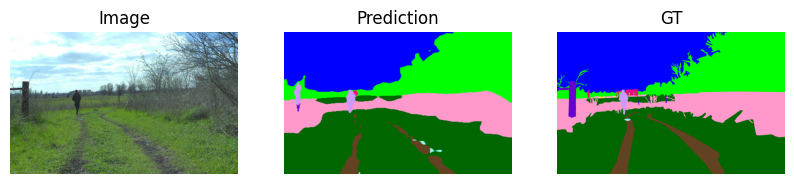

In [8]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

from detectionmetrics.utils import conversion as uc

image_fname = dataset.dataset["image"].iloc[0]
image = Image.open(image_fname)

label_fname = dataset.dataset["label"].iloc[0]
label = Image.open(label_fname)
label = uc.label_to_rgb(label, dataset.ontology)

pred = model.predict(image)
pred = uc.label_to_rgb(pred, model.ontology)
pred = pred.resize(label.size)

plt.figure(figsize=(10, 10))
plt.subplot(131), plt.title("Image"), plt.imshow(np.array(image)), plt.axis("off")
plt.subplot(132), plt.title("Prediction"), plt.imshow(np.array(pred)), plt.axis("off")
plt.subplot(133), plt.title("GT"), plt.imshow(np.array(label)), plt.axis("off")
plt.show()

## Evaluation

In [9]:
results = model.eval(dataset, split="test")
display(results)

  0%|          | 0/1672 [00:05<?, ?it/s]


IndexError: index 33 is out of bounds for dimension 0 with size 20

In [10]:
import os
import detectionmetrics

# This finds the exact path automatically
path = os.path.join(os.path.dirname(detectionmetrics.__file__), "models/torch_segmentation.py")

print("Click the link below to open the file editor:")
print(path)

# This command attempts to trigger the internal Colab editor
from google.colab import files

Click the link below to open the file editor:
/usr/local/lib/python3.12/dist-packages/detectionmetrics/models/torch_segmentation.py
